In [1]:
import pandas as pd
import numpy as np

In [10]:
univ_df = pd.read_csv("expanded.csv")
univ_df

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


In [3]:
#2. Выполнить классификацию методом навного байесовского классификатор
#1. Выполнить классификацию, используя следующие его модификации НБ:
#1.1. GaussianNB:

In [13]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

newDf = univ_df[["Gender", "Unnamed: 0", "ReadingScore", "WritingScore", "MathScore"]].copy()

print(newDf["Gender"].unique())

ordEnc = OrdinalEncoder()

nb = GaussianNB()

newDf["Gender"] = ordEnc.fit_transform(newDf[["Gender"]]).astype(int)

print(newDf.iloc[:,:-1])


X =  np.array(newDf.iloc[:,:-1])
Y =  np.array( newDf["MathScore"] )

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33)


nb.fit(X_train, y_train)


y_train_predict = nb.predict(X_train)
y_test_predict = nb.predict(X_test)
y_test_prob = nb.predict_proba(X_test)[:,0]

['female' 'male']
       Gender  Unnamed: 0  ReadingScore  WritingScore
0           0           0            71            74
1           0           1            90            88
2           0           2            93            91
3           1           3            56            42
4           1           4            78            75
...       ...         ...           ...           ...
30636       0         816            61            65
30637       1         890            53            51
30638       0         911            70            67
30639       0         934            90            93
30640       1         960            60            58

[30641 rows x 4 columns]


TRAIN ACCURACY : 0.05441083345511228
TEST ACCURACY : 0.04736946202531646


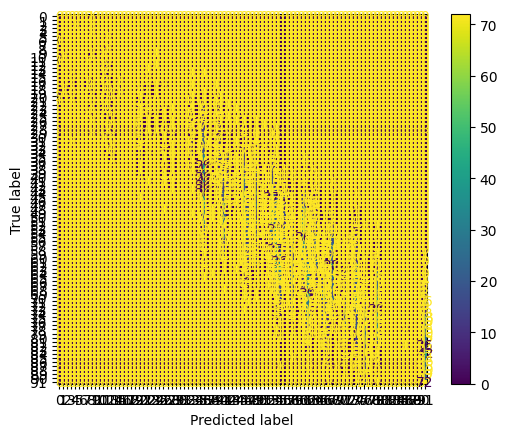

              precision    recall  f1-score   support

           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         3
          19       0.00      0.00      0.00         2
          20       0.00      0.00      0.00         2
          21       0.06      0.50      0.11         4
          22       0.00      0.00      0.00         3
          23       0.00      0.00      0.00         5
          24       0.00      0.00      0.00         5
          25       0.00      0.00      0.00         6
          26       0.00    

C:\Users\maxim\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\maxim\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\maxim\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, l

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve

print('TRAIN ACCURACY :', accuracy_score(y_train_predict, y_train))
print('TEST ACCURACY :', accuracy_score(y_test_predict, y_test))

from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
confMatr = confusion_matrix(y_test, y_test_predict)
cmPlt = ConfusionMatrixDisplay(confusion_matrix = confMatr)
cmPlt.plot()
plt.show()
print(classification_report(y_test, y_test_predict))

In [15]:
# 1.2. MultinomialNB()

In [17]:
md = MultinomialNB()

print(newDf)

X =  np.array(newDf.iloc[:,:-1])
Y =  np.array( newDf["MathScore"] )

X_trainMd, X_testMd, y_trainMd, y_testMd = train_test_split(X, Y, test_size = 0.33)


md.fit(X_trainMd, y_trainMd)

y_train_predictMd = md.predict(X_trainMd)
y_test_predictMd = md.predict(X_testMd)
y_test_probMd = md.predict_proba(X_testMd)[:,0]

       Gender  Unnamed: 0  ReadingScore  WritingScore  MathScore
0           0           0            71            74         71
1           0           1            90            88         69
2           0           2            93            91         87
3           1           3            56            42         45
4           1           4            78            75         76
...       ...         ...           ...           ...        ...
30636       0         816            61            65         59
30637       1         890            53            51         58
30638       0         911            70            67         61
30639       0         934            90            93         82
30640       1         960            60            58         64

[30641 rows x 5 columns]


TRAIN ACCURACY : 0.01217789468556676
TEST ACCURACY : 0.01038370253164557


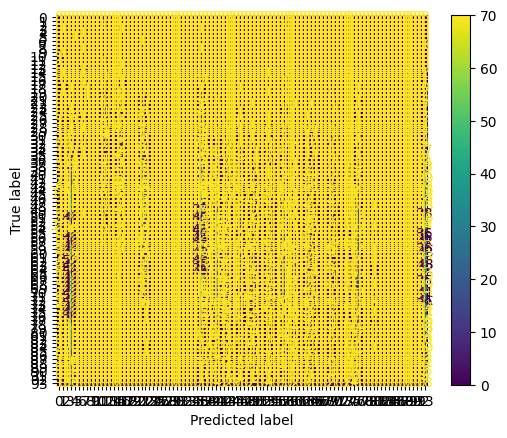

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          18       0.02      0.50      0.04         2
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         4
          22       0.00      0.00      0.00         2
          23       0.02      0.17      0.03         6
          24       0.00    

C:\Users\maxim\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\maxim\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\maxim\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, l

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve

print('TRAIN ACCURACY :', accuracy_score(y_train_predictMd, y_trainMd))
print('TEST ACCURACY :', accuracy_score(y_test_predictMd, y_testMd))

confMatrMd = confusion_matrix(y_testMd, y_test_predictMd)
cmPltMd = ConfusionMatrixDisplay(confusion_matrix = confMatrMd)
cmPltMd.plot()
plt.show()
print(classification_report(y_testMd, y_test_predictMd))

In [19]:
#1.3. ComplementNB()

In [20]:
cd = ComplementNB()

print(newDf)

X =  np.array(newDf.iloc[:,:-1])
Y =  np.array( newDf["MathScore"] )

X_trainCd, X_testCd, y_trainCd, y_testCd = train_test_split(X, Y, test_size = 0.33)


cd.fit(X_trainCd, y_trainCd)

y_train_predictCd = cd.predict(X_trainCd)
y_test_predictCd = cd.predict(X_testCd)
y_test_probCd = cd.predict_proba(X_testCd)[:,0]

       Gender  Unnamed: 0  ReadingScore  WritingScore  MathScore
0           0           0            71            74         71
1           0           1            90            88         69
2           0           2            93            91         87
3           1           3            56            42         45
4           1           4            78            75         76
...       ...         ...           ...           ...        ...
30636       0         816            61            65         59
30637       1         890            53            51         58
30638       0         911            70            67         61
30639       0         934            90            93         82
30640       1         960            60            58         64

[30641 rows x 5 columns]


TRAIN ACCURACY : 0.01217789468556676
TEST ACCURACY : 0.01038370253164557


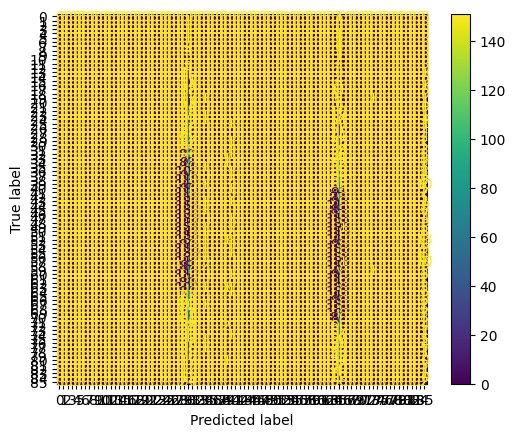

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         2
          20       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         4
          22       0.00      0.00      0.00         4
          23       0.00      0.00      0.00         5
          24       0.00      0.00      0.00         4
          25       0.00      0.00      0.00         5
          26       0.00      0.00      0.00         8
          27       0.00      0.00      0.00         7
          28       0.00      0.00      0.00        11
          29       0.00      0.00      0.00        18
          30       0.00      0.00      0.00        15
          31       0.00      0.00      0.00        23
          32       0.00    

C:\Users\maxim\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\maxim\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\maxim\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

In [21]:
print('TRAIN ACCURACY :', accuracy_score(y_train_predictMd, y_trainMd))
print('TEST ACCURACY :', accuracy_score(y_test_predictMd, y_testMd))

confMatrCd = confusion_matrix(y_testCd, y_test_predictCd)
cmPltCd = ConfusionMatrixDisplay(confusion_matrix = confMatrCd)
cmPltCd.plot()
plt.show()
print(classification_report(y_testCd, y_test_predictCd))

In [22]:
#1.4. BernoulliNB()

In [23]:
bd = BernoulliNB()

print(newDf)

X =  np.array(newDf.iloc[:,:-1])
Y =  np.array( newDf["MathScore"] )

X_trainBd, X_testBd, y_trainBd, y_testBd = train_test_split(X, Y, test_size = 0.33)


bd.fit(X_trainBd, y_trainBd)


y_train_predictBd = bd.predict(X_trainBd)
y_test_predictBd = bd.predict(X_testBd)
y_test_probBd = bd.predict_proba(X_testBd)[:,0]

       Gender  Unnamed: 0  ReadingScore  WritingScore  MathScore
0           0           0            71            74         71
1           0           1            90            88         69
2           0           2            93            91         87
3           1           3            56            42         45
4           1           4            78            75         76
...       ...         ...           ...           ...        ...
30636       0         816            61            65         59
30637       1         890            53            51         58
30638       0         911            70            67         61
30639       0         934            90            93         82
30640       1         960            60            58         64

[30641 rows x 5 columns]


TRAIN ACCURACY : 0.02912952408787569
TEST ACCURACY : 0.026602056962025316


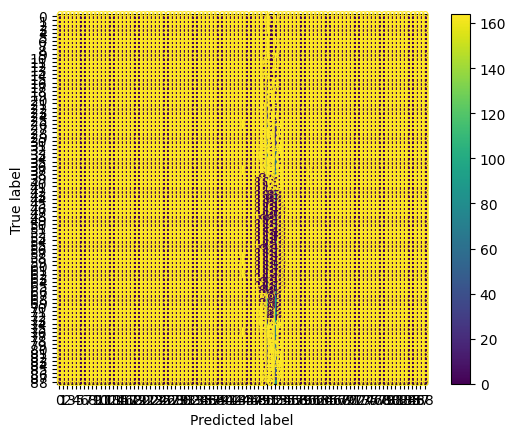

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         3
          13       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         2
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         2
          21       0.00      0.00      0.00         5
          22       0.00      0.00      0.00         3
          23       0.00      0.00      0.00         6
          24       0.00      0.00      0.00         4
          25       0.00      0.00      0.00         8
          26       0.00      0.00      0.00        11
          27       0.00      0.00      0.00         9
          28       0.00      0.00      0.00        16
          29       0.00    

C:\Users\maxim\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\maxim\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\maxim\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

In [24]:
print('TRAIN ACCURACY :', accuracy_score(y_train_predictBd, y_trainBd))
print('TEST ACCURACY :', accuracy_score(y_test_predictBd, y_testBd))

confMatrBd = confusion_matrix(y_testBd, y_test_predictBd)
cmPltBd = ConfusionMatrixDisplay(confusion_matrix = confMatrBd)
cmPltBd.plot()
plt.show()
print(classification_report(y_testBd, y_test_predictBd))

In [25]:
#3. Выполните классификацию с использованием дерева решений:
#1. Попробовать подобрать опытным путем наилучшие значения параметров дерева решений

In [29]:
X =  np.array(newDf.iloc[:,:-1])
Y =  np.array( newDf["MathScore"] )

X_trainTd, X_testTd, y_trainTd, y_testTd = train_test_split(X, Y, test_size = 0.33)

TRAIN ACCURACY : 0.43674801500316623
TEST ACCURACY : 0.047171677215189875


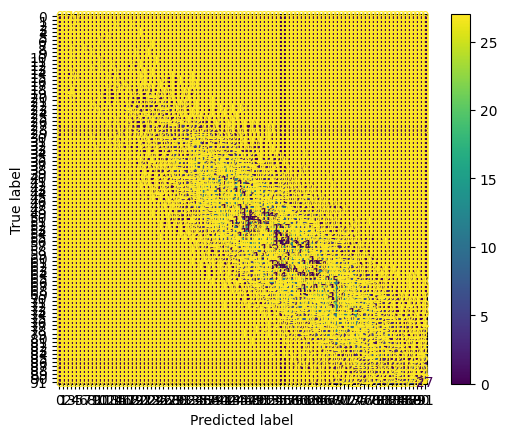

              precision    recall  f1-score   support

           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         2
          10       0.08      1.00      0.14         1
          11       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         2
          18       0.00      0.00      0.00         3
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         2
          21       0.00      0.00      0.00         3
          22       0.00      0.00      0.00         3
          23       0.10      0.25      0.14         4
          24       0.00      0.00      0.00         7
          25       0.00      0.00      0.00         5
          26       0.00    

C:\Users\maxim\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\maxim\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\maxim\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

In [30]:
from sklearn.tree import DecisionTreeClassifier

clfTd = DecisionTreeClassifier( criterion = "gini", random_state = 43, min_samples_split = 8, min_samples_leaf = 1 )

# criterion {“gini”, “entropy”, “log_loss”}, default=”gini”
# splitter {“best”, “random”}, default=”best”
# max_depth int, default=None
# min_samples_split int or float, default=2
# min_samples_leaf int or float, default=1

clfTd.fit(X_trainTd, y_trainTd)

y_train_predictTd = clfTd.predict(X_trainTd)
y_test_predictTd = clfTd.predict(X_testTd)
y_test_probTd = clfTd.predict_proba(X_testTd)[:,0]
print('TRAIN ACCURACY :', accuracy_score( y_train_predictTd, y_trainTd ))
print('TEST ACCURACY :', accuracy_score( y_test_predictTd, y_testTd ))

import matplotlib.pyplot as plt

confMatrTd = confusion_matrix(y_testTd, y_test_predictTd)
cmPltTd = ConfusionMatrixDisplay(confusion_matrix = confMatrTd)
cmPltTd.plot()
plt.show()
print(classification_report(y_testTd, y_test_predictTd))

In [31]:
#Текстовая:
from sklearn import tree

textDescr = tree.export_text(clfTd, feature_names = list(newDf.iloc[:, :-1]) )
print(textDescr)

|--- ReadingScore <= 72.50
|   |--- ReadingScore <= 56.50
|   |   |--- Gender <= 0.50
|   |   |   |--- WritingScore <= 47.50
|   |   |   |   |--- WritingScore <= 43.50
|   |   |   |   |   |--- ReadingScore <= 27.50
|   |   |   |   |   |   |--- Unnamed: 0 <= 865.00
|   |   |   |   |   |   |   |--- WritingScore <= 15.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- WritingScore >  15.50
|   |   |   |   |   |   |   |   |--- WritingScore <= 29.50
|   |   |   |   |   |   |   |   |   |--- Unnamed: 0 <= 310.00
|   |   |   |   |   |   |   |   |   |   |--- class: 9
|   |   |   |   |   |   |   |   |   |--- Unnamed: 0 >  310.00
|   |   |   |   |   |   |   |   |   |   |--- class: 13
|   |   |   |   |   |   |   |   |--- WritingScore >  29.50
|   |   |   |   |   |   |   |   |   |--- class: 15
|   |   |   |   |   |   |--- Unnamed: 0 >  865.00
|   |   |   |   |   |   |   |--- class: 11
|   |   |   |   |   |--- ReadingScore >  27.50
|   |   |   |   |   |   |--- ReadingS

Index(['Gender', 'Unnamed: 0', 'ReadingScore', 'WritingScore'], dtype='object')


IndexError: list index out of range

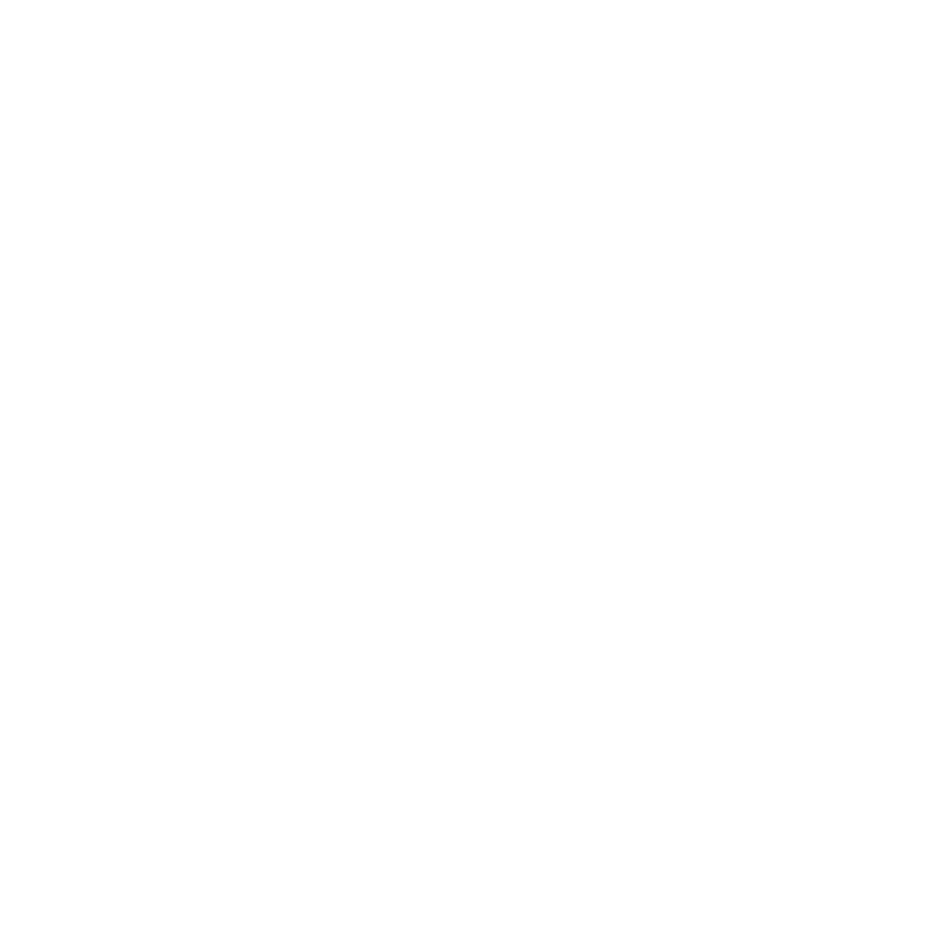

In [40]:
#Графическая:
print(newDf.columns[:-1])
fig = plt.figure(figsize=(12,12))
res = tree.plot_tree(clfTd,
                   feature_names = ["Gender", "MathScore", "ReadingScore", "WritingScore", "G3"] ,
                   class_names = ["15", "16", "17", "18", "19", "20", "21", "22"],
                   filled = True, rounded=True)

Index(['Gender', 'Unnamed: 0', 'ReadingScore', 'WritingScore'], dtype='object')


IndexError: list index out of range

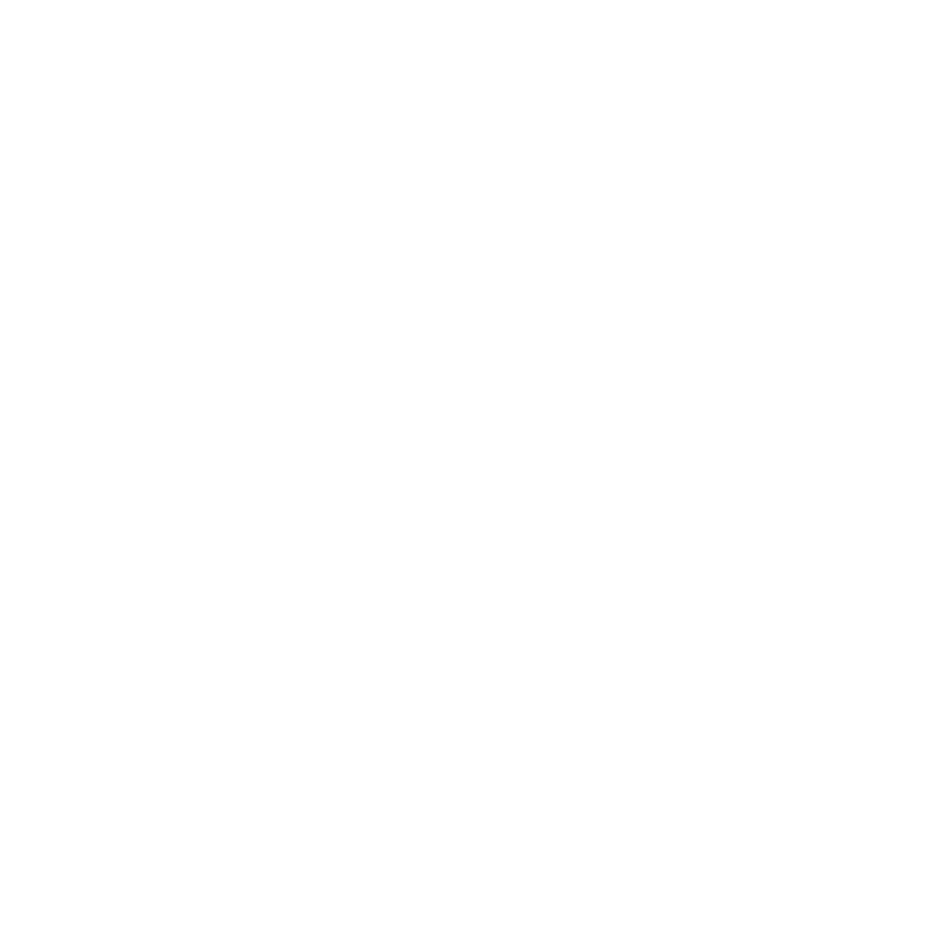